In [12]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from itertools import combinations
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123456)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}


def evaluate_feature_combinations(classifier, X_train, y_train, X_test, y_test):
    best_score = 0
    best_combination = []
    for i in range(1, X_train.shape[1] + 1):
        print(f"Classifier - {classifier}")
        for combo in combinations(range(X_train.shape[1]), i):
            X_train_combo = X_train[:, combo]
            X_test_combo = X_test[:, combo]

            classifier.fit(X_train_combo, y_train)
            y_pred = classifier.predict(X_test_combo)
            score = accuracy_score(y_test, y_pred)
            print(f"features: {[iris.feature_names[i] for i in combo]}. Accuracy: {score} ")
            if score > best_score:
                best_score = score
                best_combination = combo
        print('\n')
    return best_combination, best_score


best_combinations = {}
for name, classifier in classifiers.items():
    best_features, best_accuracy = evaluate_feature_combinations(classifier, X_train, y_train, X_test, y_test)
    feature_names = [iris.feature_names[i] for i in best_features]
    best_combinations[name] = (feature_names, best_accuracy)

max_accuracy = 0.0
max_accuracy_model = ""

for model, (features, accuracy) in best_combinations.items():
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_accuracy_models = [(model, features)]
    elif accuracy == max_accuracy:
        max_accuracy_models.append((model, features))

print(f"Модели с максимальной точностью:")
for model, features in max_accuracy_models:
    print(f"Модель: {model}")
    print(f"Значение максимальной точности: {max_accuracy}")
    print(f"Признаки: {features}")


Classifier - LogisticRegression()
features: ['sepal length (cm)']. Accuracy: 0.7333333333333333 
features: ['sepal width (cm)']. Accuracy: 0.6 
features: ['petal length (cm)']. Accuracy: 0.9466666666666667 
features: ['petal width (cm)']. Accuracy: 0.9733333333333334 


Classifier - LogisticRegression()
features: ['sepal length (cm)', 'sepal width (cm)']. Accuracy: 0.8533333333333334 
features: ['sepal length (cm)', 'petal length (cm)']. Accuracy: 0.9466666666666667 
features: ['sepal length (cm)', 'petal width (cm)']. Accuracy: 0.96 
features: ['sepal width (cm)', 'petal length (cm)']. Accuracy: 0.9466666666666667 
features: ['sepal width (cm)', 'petal width (cm)']. Accuracy: 0.96 
features: ['petal length (cm)', 'petal width (cm)']. Accuracy: 0.9733333333333334 


Classifier - LogisticRegression()
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']. Accuracy: 0.9466666666666667 
features: ['sepal length (cm)', 'sepal width (cm)', 'petal width (cm)']. Accuracy: 0.

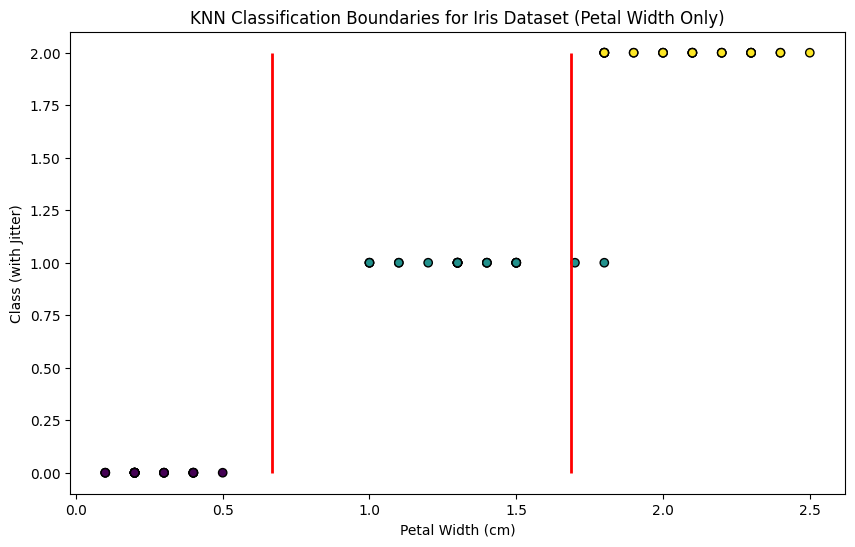

In [13]:
iris = load_iris()
X = iris.data[:, 3:]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123456)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

x_min, x_max = X.min() - 0.1, X.max() + 0.1
xx = np.linspace(x_min, x_max, 75).reshape(-1, 1)

predictions = knn.predict(xx)

change_points = xx[np.where(np.diff(predictions) != 0)]

plt.figure(figsize=(10, 6))

plt.scatter(x=X_test, y=y_test, c=y_test, cmap='viridis', edgecolor='k')

for point in change_points:
    plt.vlines(point, 0, 2, color='red', linestyle='-', linewidth=2)

plt.title('KNN Classification Boundaries for Iris Dataset (Petal Width Only)')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Class (with Jitter)')
plt.show()


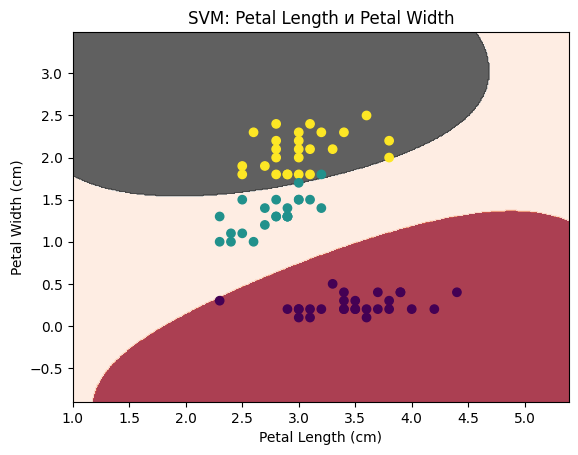

In [14]:
iris = load_iris()
X = iris.data[:, [1, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123456)

clf = SVC()

clf.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap="RdGy", alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis")
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM: Petal Length и Petal Width')
plt.show()